# A multiple linear regression problem based on students performances
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

In [78]:
!pip install pandas numpy matplotlib scikit-learn seaborn

# Import Data

In [79]:
import pandas as pd
import numpy as np

In [80]:
data = pd.read_csv("Student_Performance.csv")

In [81]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [82]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

# Split Data

In [83]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,test_size=0.3,random_state=42)

In [84]:
train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9069,4,99,Yes,6,1,82.0
2603,6,90,Yes,9,3,79.0
7738,8,57,No,6,1,50.0
1579,6,92,Yes,8,7,81.0
5058,6,64,Yes,8,4,52.0
...,...,...,...,...,...,...
5734,8,50,Yes,6,6,48.0
5191,4,68,No,9,3,51.0
5390,9,48,No,7,6,44.0
860,1,47,No,9,0,20.0


In [85]:
test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6252,5,69,No,8,2,51.0
4684,2,46,Yes,4,8,20.0
1731,7,56,Yes,7,5,46.0
4742,6,42,Yes,8,5,28.0
4521,7,53,No,4,6,41.0
...,...,...,...,...,...,...
8014,6,42,Yes,9,5,32.0
1074,2,60,No,7,7,40.0
3063,5,48,Yes,6,4,33.0
6487,3,86,Yes,9,5,69.0


# Visualisations

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns

[]

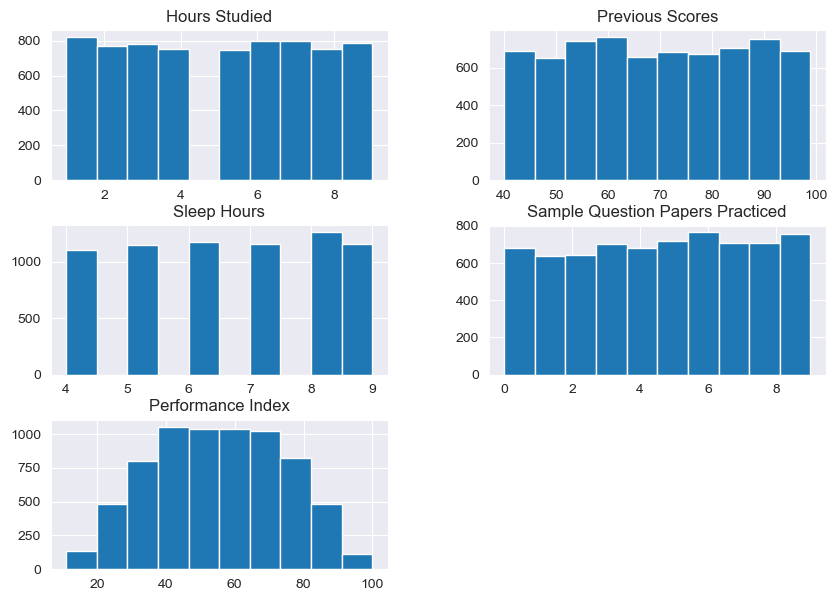

In [87]:
train.hist(figsize=(10,7))
plt.plot()

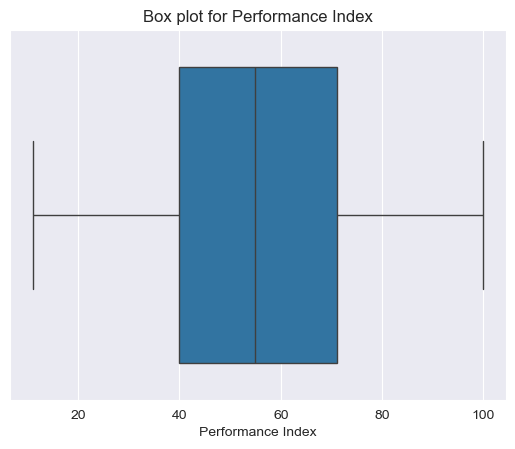

In [88]:
plt.title("Box plot for Performance Index")
sns.boxplot(x=train['Performance Index'])
plt.show()

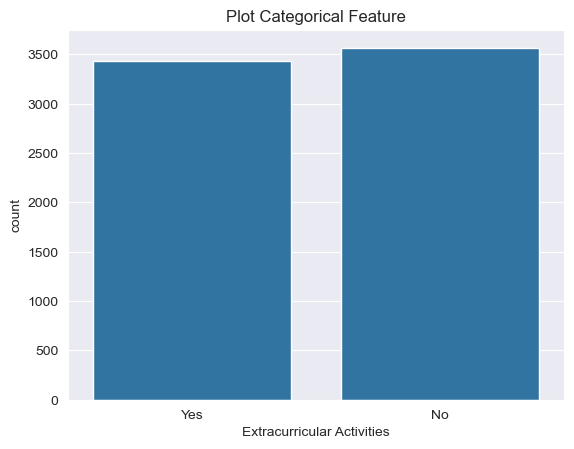

In [89]:
plt.title('Plot Categorical Feature')
sns.countplot(x=train['Extracurricular Activities'])
plt.show()

## Make the correlation table

In [90]:
correlation_table = train.select_dtypes(exclude='object').corr()
correlation_table

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.009193,0.009714,0.010686,0.378954
Previous Scores,-0.009193,1.000000,0.003738,0.009978,0.914200
Sleep Hours,0.009714,0.003738,1.000000,-0.000006,0.049302
Sample Question Papers Practiced,0.010686,0.009978,-0.000006,1.000000,0.041568
Performance Index,0.378954,0.914200,0.049302,0.041568,1.000000


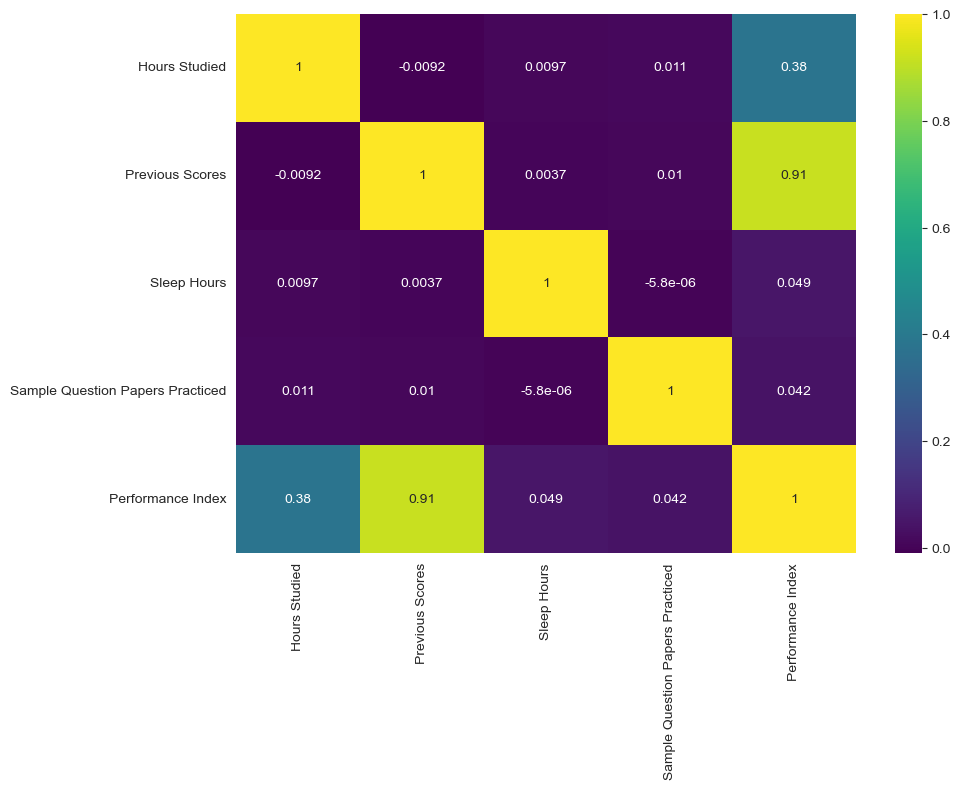

In [91]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation_table,annot=True, cmap='viridis')
plt.show()

In [92]:
def plot_linear_relationships(X,y, title):
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=X, y=y)
    plt.title(title)
    plt.show()

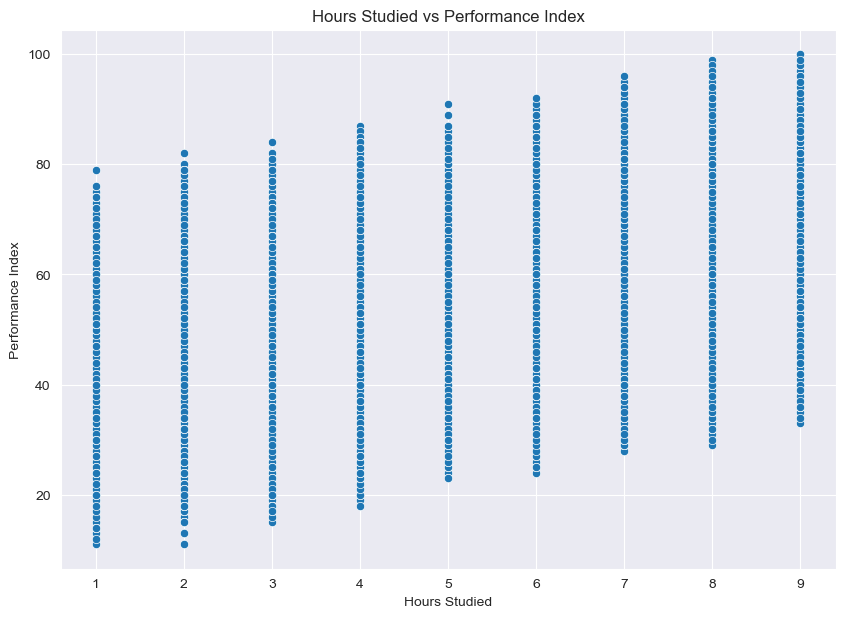

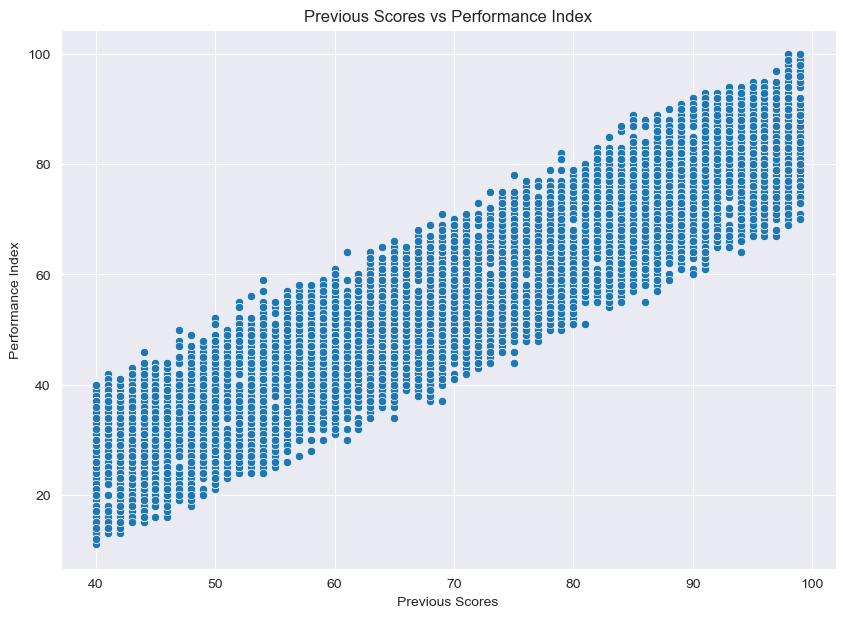

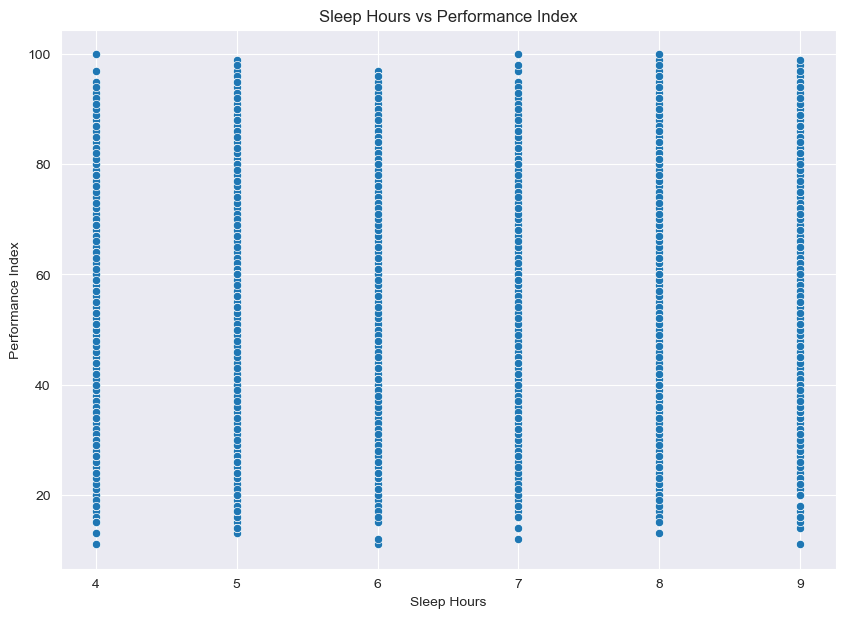

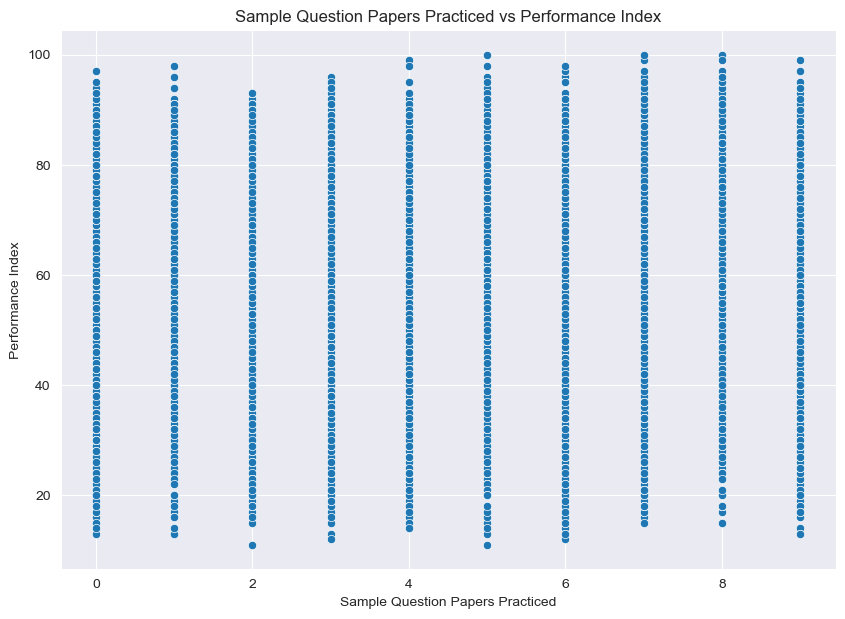

In [93]:
for column in train.columns:
    if train[column].dtype != 'object' and column != 'Performance Index':
        plot_linear_relationships(train[column],train['Performance Index'],f'{column} vs Performance Index')

We see that the sleep hours and sample questions doesn't provide us much informations

## Are extracurricular activities driving values?

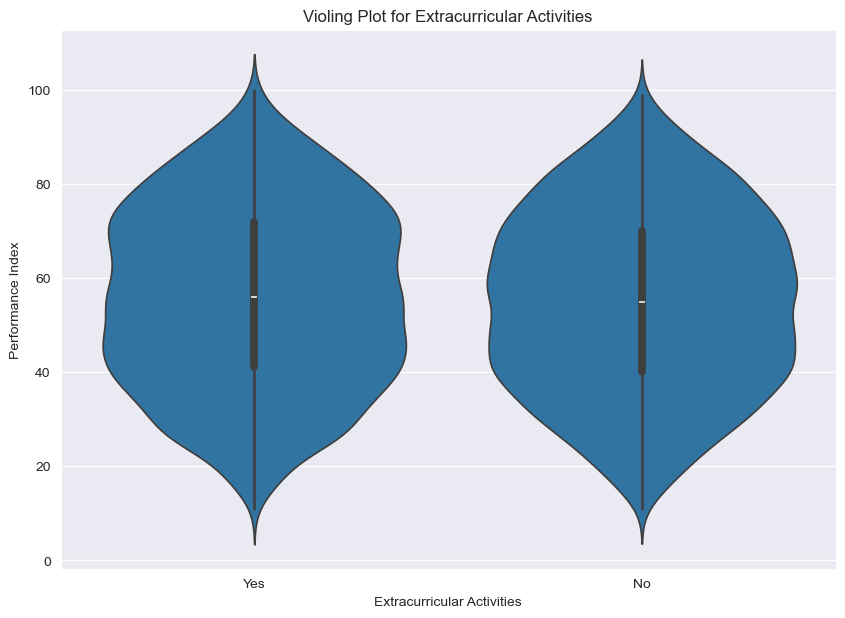

In [94]:
plt.figure(figsize=(10,7))
sns.violinplot(x=train['Extracurricular Activities'], y=train['Performance Index'])
plt.title('Violing Plot for Extracurricular Activities')
plt.show()

# Data analysis

In [95]:
train[train['Extracurricular Activities'].isnull()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     7000 non-null   int64  
 1   Previous Scores                   7000 non-null   int64  
 2   Extracurricular Activities        7000 non-null   object 
 3   Sleep Hours                       7000 non-null   int64  
 4   Sample Question Papers Practiced  7000 non-null   int64  
 5   Performance Index                 7000 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 382.8+ KB


In [97]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

## First we test our preprocessing methods

In [98]:
X = train.drop(['Performance Index'],axis=1)
y = train['Performance Index']

In [99]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9069,4,99,Yes,6,1
2603,6,90,Yes,9,3
7738,8,57,No,6,1
1579,6,92,Yes,8,7
5058,6,64,Yes,8,4
...,...,...,...,...,...
5734,8,50,Yes,6,6
5191,4,68,No,9,3
5390,9,48,No,7,6
860,1,47,No,9,0


In [100]:
y

9069    82.0
2603    79.0
7738    50.0
1579    81.0
5058    52.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 7000, dtype: float64

In [101]:
one_hot = OneHotEncoder()
one_hot.fit(X[['Extracurricular Activities']])
encoded_index = one_hot.transform(X[['Extracurricular Activities']])

In [102]:
encoded_index.toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [103]:
X = X.drop(['Extracurricular Activities'],axis=1)

In [104]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
9069,4,99,6,1
2603,6,90,9,3
7738,8,57,6,1
1579,6,92,8,7
5058,6,64,8,4
...,...,...,...,...
5734,8,50,6,6
5191,4,68,9,3
5390,9,48,7,6
860,1,47,9,0


In [111]:
encoded_df = pd.DataFrame(encoded_index.toarray(), columns=one_hot.get_feature_names_out(), index=X.index)
encoded_df.head()

,Extracurricular Activities_No,Extracurricular Activities_Yes
9069,0.0,1.0
2603,0.0,1.0
7738,1.0,0.0
1579,0.0,1.0
5058,0.0,1.0


In [106]:
X = pd.concat([encoded_df, X],axis=1)
X

,Extracurricular Activities_No,Extracurricular Activities_Yes,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
9069,0.0,1.0,4,99,6,1
2603,0.0,1.0,6,90,9,3
7738,1.0,0.0,8,57,6,1
1579,0.0,1.0,6,92,8,7
5058,0.0,1.0,6,64,8,4
...,...,...,...,...,...,...
5734,0.0,1.0,8,50,6,6
5191,1.0,0.0,4,68,9,3
5390,1.0,0.0,9,48,7,6
860,1.0,0.0,1,47,9,0


In [112]:
scl = StandardScaler()
scl.fit(X.drop(['Extracurricular Activities_No','Extracurricular Activities_Yes'],axis=1))
scl_df = scl.transform(X.drop(['Extracurricular Activities_No','Extracurricular Activities_Yes'],axis=1))

In [113]:
scl.get_feature_names_out()

array(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'], dtype=object)

In [114]:
scl

StandardScaler()

In [117]:
X.columns

Index(['Extracurricular Activities_No', 'Extracurricular Activities_Yes',
       'Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [118]:
X[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']] = scl_df

In [119]:
X

,Extracurricular Activities_No,Extracurricular Activities_Yes,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
9069,0.0,1.0,-0.379217,1.695434,-0.319443,-1.262261
2603,0.0,1.0,0.391102,1.176378,1.448690,-0.564824
7738,1.0,0.0,1.161422,-0.726827,-0.319443,-1.262261
1579,0.0,1.0,0.391102,1.291724,0.859313,0.830049
5058,0.0,1.0,0.391102,-0.323116,0.859313,-0.216106
...,...,...,...,...,...,...
5734,0.0,1.0,1.161422,-1.130537,-0.319443,0.481331
5191,1.0,0.0,-0.379217,-0.092425,1.448690,-0.564824
5390,1.0,0.0,1.546581,-1.245882,0.269935,0.481331
860,1.0,0.0,-1.534697,-1.303555,1.448690,-1.610979
